# Algorithms practice

## Explore-Exploit algorithms

### Epsilon-Greedy (based on [tutorial from GeeksforGeeks](https://www.geeksforgeeks.org/epsilon-greedy-algorithm-in-reinforcement-learning/))

Epsilon-greedy is an algorithmic approach to maximizing rewards amid the explore-exploit tradeoff. You can either explore or exploit, not do both. An epsilon-greedy algorithm chooses to exploit most of the time, but with a small chance of exploring.

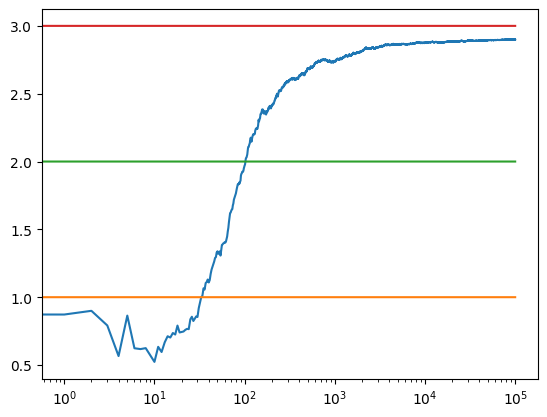

Realized mean value of action 0
1.0081036449889071
Realized mean value of action 1
1.9857762090049793
Realized mean value of action 2
3.002243523871359


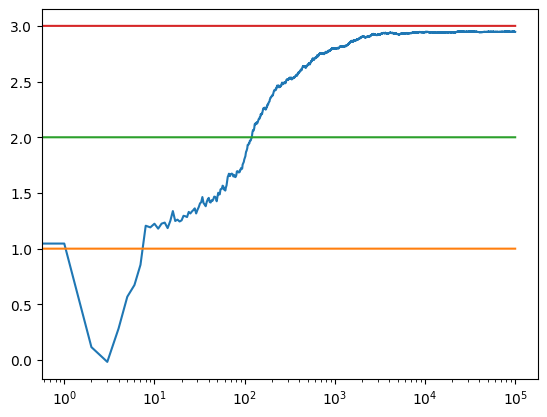

Realized mean value of action 0
0.9790428821531676
Realized mean value of action 1
2.011937859825182
Realized mean value of action 2
2.998144891056617


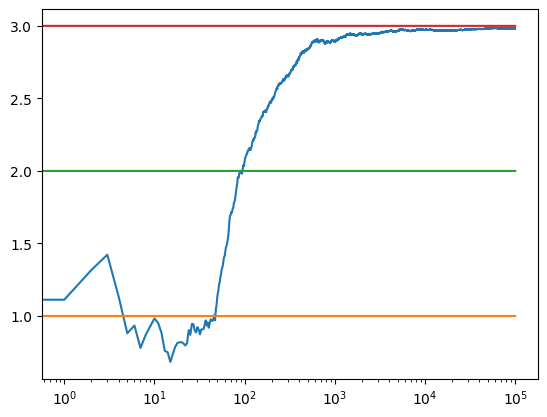

Realized mean value of action 0
1.0800335866441693
Realized mean value of action 1
1.8739418753001997
Realized mean value of action 2
2.993168015662445
Realized mean action value with an epsilon of 10%: 
2.885566198328036
Realized mean action value with an epsilon of 5%: 
2.9397352635590552
Realized mean action value with an epsilon of 1%: 
2.9737850006294337


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

# Define Action class 
class Actions: 
  def __init__(self, m): 
    # Expected value of taking the action (i.e., multiplier)
    self.m = m
    # Past mean value of having taken the action
    self.mean = 0
    # Action counter
    self.N = 0

  # Randomly choose a number from the standard normal distribution (mean 0, sd 1)
  # and use it to add noise to the expected value of taking the action
  def choose(self):
    return np.random.randn() + self.m 

  # Update the action counter and action-value estimate 
  def update(self, x): 
    self.N += 1
    # Use the incremental update formula for the sample mean
    # (E.g., if the current action is the tenth, we add the 9/10 the
    # previous mean to 1/10 the new action value to get the new mean)
    self.mean = (1 - 1.0 / self.N) * self.mean + (1.0 / self.N) * x 


def run_experiment(m1, m2, m3, eps, N): 
	# Intialize an array of three Action class instances (each representing a 
  # different action we could take, with a different expected value)
  actions = [Actions(m1), Actions(m2), Actions(m3)] 

  # Initialize empty array of length N
  data = np.empty(N)
    
  for i in range(N):
    # Choose a random probability 'p' from the uniform distribution from 0 to 1
    p = np.random.random()

    # If p is lower than whatever probability threshold ("espilon") we have set,
    # then "explore" by taking a random action
    if p < eps:
      # Choose a random integer from range(0,3): i.e., 0, 1, or 2
      j = np.random.choice(3)

    # Otherwise, choose the action with the highest mean realized action value
    else:
      j = np.argmax([a.mean for a in actions])

    # "Take" the selected action by generating a realized value, calculated as
    # expected value + random noise factor
    x = actions[j].choose()

    # Update the mean realized value for the action
    actions[j].update(x)

    # Add the expected value of the selected action to an array representing
    # a time series of the realized values of the actions we took
    data[i] = x 
  
  # For each data point in the time series array, calculate the cumulative
  # mean of our realized action values up to that point
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1) 

  # plot our realized cumulative mean against horizontal lines showing the
  # initial expected values of the three actions; use log scale
  plt.plot(cumulative_average) 
  plt.plot(np.ones(N)*m1) 
  plt.plot(np.ones(N)*m2) 
  plt.plot(np.ones(N)*m3) 
  plt.xscale('log') 
  plt.show() 

  # Print mean realized value of each action
  for i, a in enumerate(actions):
    print(f"Realized mean value of action {str(i)}")
    print(a.mean)

  # Return the mean realized value of the actions we took
  return cumulative_average

# Run the experiment with an epsilon of 10% and 100,000 turns
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

# Run the experiment with an epsilon of 5% and 100,000 turns
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)

# Run the experiment with an epsilon of 1% and 100,000 turns
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

print("Realized mean action value with an epsilon of 10%: ")
print(np.mean(c_1))
print("Realized mean action value with an epsilon of 5%: ")
print(np.mean(c_05))
print("Realized mean action value with an epsilon of 1%: ")
print(np.mean(c_01))

Across multiple trials, it generally seems to be the 1% epsilon threshold that performs best in this simulation. As a highly curious person who spends *most* of his time exploring (a dispositionally high-epsilon person), I find this a bit discouraging, but I also think it has a lot of explanatory power. There's a reason I live in abject poverty.

Of course, the optimal value of epsilon in any real-world scenario depends a great deal on the parameters: the expected values of the different options, the amount of noise, the number of remaining turns. Some advanced strategies also reduce the value of epsilon over time, to reflect that we now have better estimates of expected value and lower uncertainty, so we don't need to experiment as much.

Furthermore, the above simulation makes a couple assumptions that don't apply in most real-world situations: that we know the full set of available options (i.e., that exploration won't uncover new ones) and that expected value is stationary (e.g., that external factors like competition won't change the expected value of an action, and that). It could be argued, for instance, that in decision-making about careers or investing, expected value is highly non-stationary (and becoming moreso every day).

### UCB1

### Thompson Sampling

### Softmax

### Bayesian Bandits

## Algorithms to implement

This is a reference list of algorithms I'd like to practice implementing, from a pretty good [list of basic algorithms by Pranam Bhat](https://www.linkedin.com/pulse/list-algorithms-computer-programming-pranam-bhat/):

 Searching: 

1) Binary Search 

2) Linear Search 

3) Depth First Search 

4) Breadth First Search 

5) Rabin-Karp Algorithm 

6) Z Algorithm 


Sorting: 

1) Insertion Sort 

2) Heap Sort 

3) Selection Sort 

4) Merge Sort 

5) Quick Sort 

6) Counting Sort 

7) Bucket Sort 

8) Bubble Sort 

9) Radix Sort 

10) Shell Sort 

11) Comb Sort 

12) Pigeonhole Sort 

13) Cycle Sort 


Graphs: 

1) Kruskal's Algorithm 

2) Dijkstra's Algorithm 

3) Bellman Ford Algorithm 

4) Floyd Warshall Algorithm 

5) Topological Sort Algorithm 

6) Flood Fill Algorithm 

7) Lee Algorithm 

8) Prim's Algorithm 

9) Boruvka's Algorithm 

10) Johnson's Algorithm 

11) Kosaraju's Algorithm 

12) Tarjan's Algorithm 


Arrays: 

1) Kadane's Algorithm 

2) Floyd's Cycle Detection Algorithm 

3) Knuth-Morris-Pratt Algorithm (KMP) 

4) Quick Select Algorithm 

5) Boyer - More Majority Vote Algorithm 


Tree: 

1) AA Tree 

2) Binary Indexed Tree or Fenwick Tree 

3) Quadtree 

4) Cartesian Tree 

5) Fibonacci heap 

6) Interval Tree 

7) Finger Tree 

8) Crit-bit Trees 

9) Scapegoat Tree 

10) Splay Tree 

11) Suffix Tree 

12) Counted B-Trees 

13) Binary Space Partitioning 

14) Van Emde Boas Tree 


Others: 

1) Huffman Coding Compression Algorithm 

2) Euclid's Algorithm 

3) Union Find Algorithm 

4) Manacher's Algorithm 

5) Eukerian Path (Hierholzer's Algorithm) 

6) Convex Hull | Set 1 (Jarvis’s Algorithm or Wrapping) 

7) Convex Hull | Set 2 (Graham Scan) 

8) Convex Hull using Divide and Conquer Algorithm 

9) Quickhull Algorithm for Convex Hull 

10) Distinct elements in subarray using Mo’s Algorithm 

11) Line Sweep Algorithm 

12) MO’s Algorithm (Query square root decomposition) 

13) Disjoint-set Data Structure 

14) Ackermann Function 

15) Zobrist Hashing 

16) FM-index 

17) Circular buffer 

18) Hungarian Algorithm / Kuhn–Munkres Algorithm / Munkres Assignment Algorithm 

19) Dekker's Algorithm 

20) Winged Edge 

21) Burrows–Wheeler Transform 

22) Zipper 

23) Five Balltree Construction Algorithms 

24) Cuckoo Hashing 

25) Rope (Data Structure) 

26) Binary Decision Diagram 

27) Disjoint-set Data Structure 

28) Bloom Filter 